In [1]:
import RPW_STIX_pylab as sololab
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

# EVENT 18 Nov 2020 10:01

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1267936272_20201118T124401-20201118T135621_030106_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


  data cropped from  2020-11-18 12:44:00  to  2020-11-18 13:56:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675
  Creating mean bkg from  18-Nov-2020 12:50:00  to  18-Nov-2020 13:00:00 ...
  bkg done.
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 12:44:28  to  18-Nov-2020 13:55:31


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


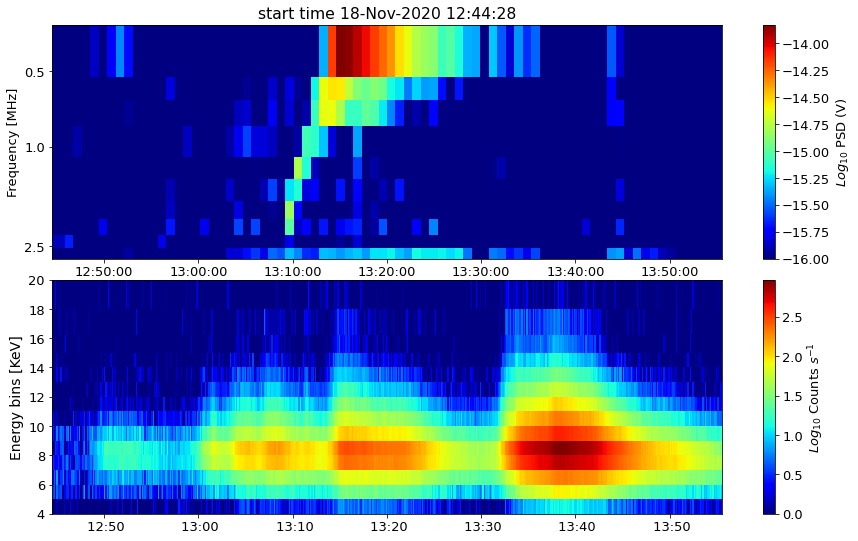

In [2]:
#STIX files
stx_L1file = "../STIX/stx_files/20201118/solo_L1A_stix-sci-xray-l1-1267936272_20201118T124401-20201118T135621_030106_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 12:44:00"
end_time = "18-Nov-2020 13:56:00"


start_bkg = "18-Nov-2020 12:50:00"
end_bkg = "18-Nov-2020 13:00:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]


bkg_range=[start_bkg,end_bkg]
bkg_interval = [dt.datetime.strptime(x,dt_fmt) for x in bkg_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile,correct_flight_time=True)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,rpw_bkg_interval=bkg_range,
                         freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "18-Nov-2020 13:09:30":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "18-Nov-2020 13:01:10":"white",
               "18-Nov-2020 13:05:30":"white",
               "18-Nov-2020 13:08:00":"white",
               "18-Nov-2020 13:15:30":"white",
               "18-Nov-2020 13:38:30":"white",
               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,20],#markers=markerlines,
                               markerwidth=1)

Estimated uncertainty:
  Time: 26.5 s
  Freq: between 25.0-175.0 kHz
Defining time reference...
 t0 =  18-Nov-2020 13:09:40
Fitting peaks for 9 frequencies between 425.0 kHz and 2425.0 kHz
[8] 2425 kHz   : Not in bounds! omitted.
[7] 2075 kHz   : Not in bounds! omitted.
Starting point ---------- frequency: 1825+-125 kHz   time: 18-Nov-2020 13:09:52
[6] 1825 kHz: Fit found!   t-t0: 12.23 s   Dif.: 12.23 s  Log10(RMSE): -16.26  Log10(S/N): 1.22
[5] 1475 kHz: Fit found!   t-t0: 31.16 s   Dif.: 18.93 s  Log10(RMSE): -15.90  Log10(S/N): 0.79
[4] 1225 kHz: Fit found!   t-t0: 78.03 s   Dif.: 46.87 s  Log10(RMSE): -15.84  Log10(S/N): 1.86
[3] 975 kHz: Fit found!   t-t0: 143.40 s   Dif.: 65.37 s  Log10(RMSE): -15.41  Log10(S/N): 0.75
[2] 675 kHz: Fit found!   t-t0: 256.88 s   Dif.: 113.49 s  Log10(RMSE): -14.96  Log10(S/N): 0.60
[1] 625 kHz: Fit found!   t-t0: 296.56 s   Dif.: 39.68 s  Log10(RMSE): -14.83  Log10(S/N): 0.61
[0] 425 kHz: Fit found!   t-t0: 397.03 s   Dif.: 100.47 s  Log10(RMSE): 

/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


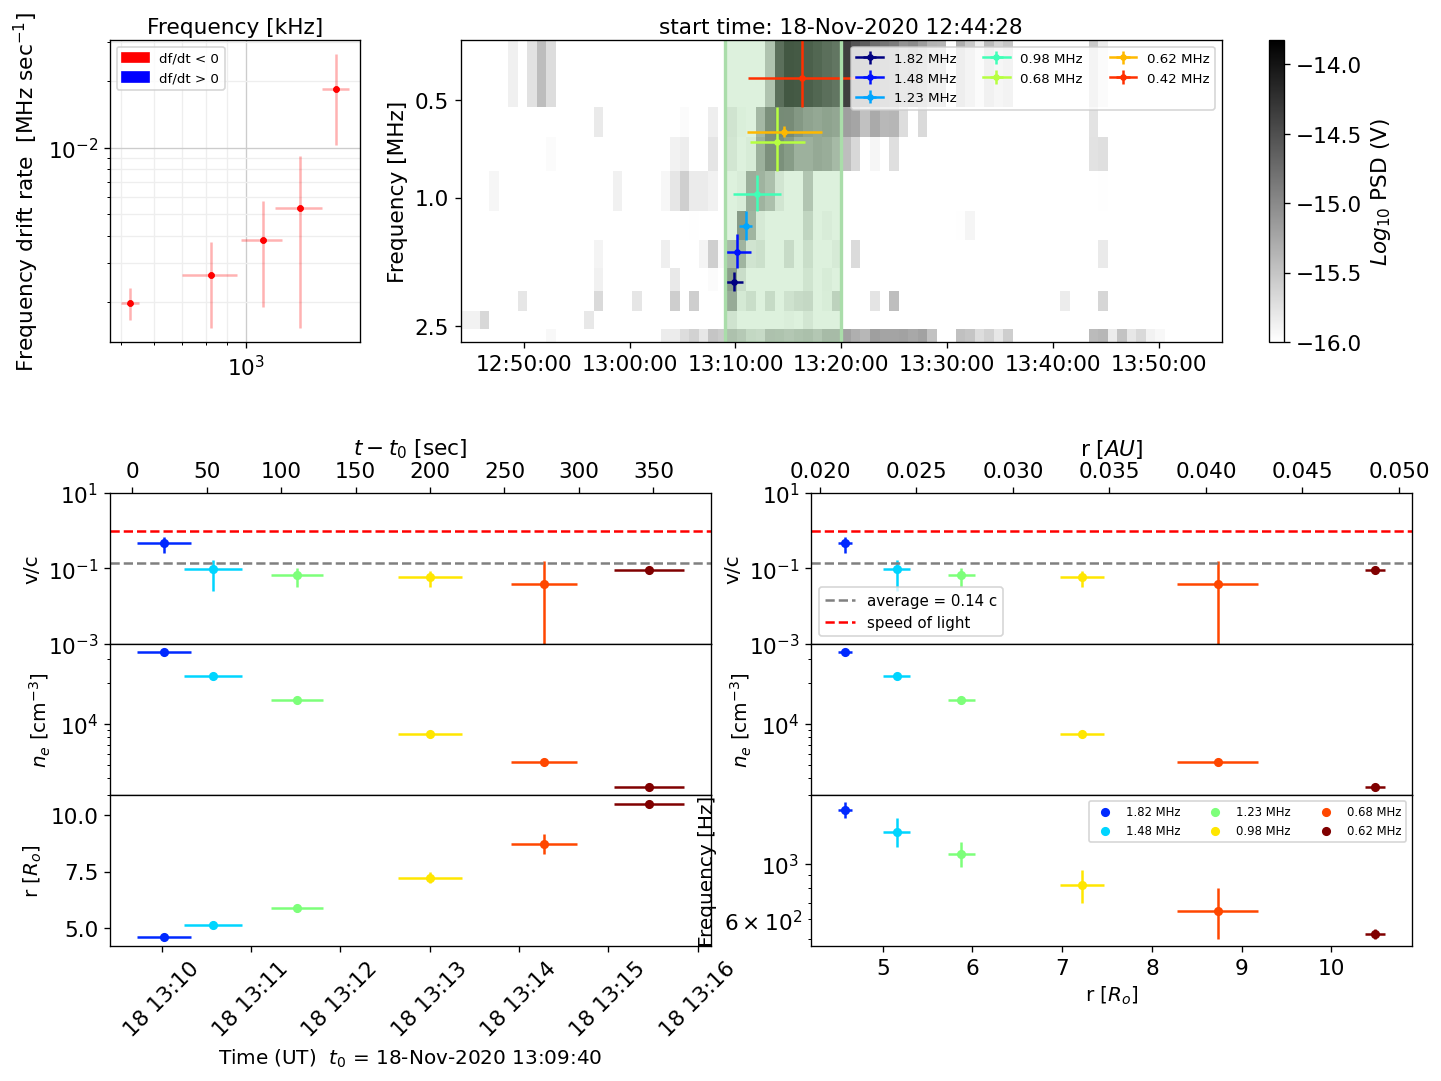

In [3]:
trange_fit = ["18-Nov-2020 13:09:00","18-Nov-2020 13:20:00"]
fp = sololab.rpw_fit_freq_peaks(rpw_psd,sololab.fit_func_gaussian,trange_fit,frequency_range=[0,2500])
fdr = sololab.rpw_freq_drifts(fp)
v = sololab.rpw_estimate_beam_velocity(fdr,sololab.ne_from_r_leblanc)
plt.close()
sololab.rpw_plot_typeIII_diagnostics(rpw_psd,fp,fdr,v)

# EVENT 18 Nov 2020 22:30

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268092688_20201118T221540-20201118T225850_030122_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)
  data cropped from  2020-11-18 22:11:00  to  2020-11-18 22:58:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675
  Creating mean bkg from  18-Nov-2020 22:20:00  to  18-Nov-2020 22:25:00 ...
  bkg done.
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 22:15:50  to  18-Nov-2020 22:57:46


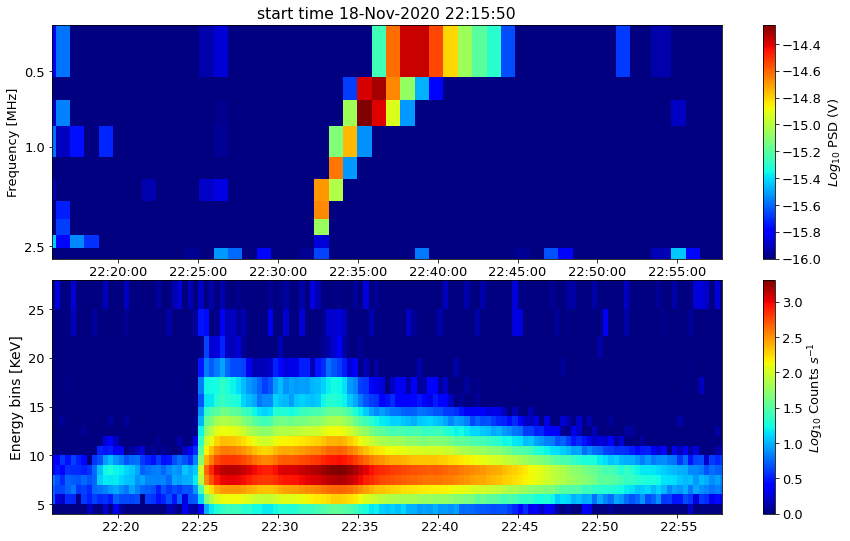

In [4]:
# 18NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201118/solo_L1A_stix-sci-xray-l1-1268092688_20201118T221540-20201118T225850_030122_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 22:11:00"
end_time = "18-Nov-2020 22:58:00"

start_bkg = "18-Nov-2020 22:20:00"
end_bkg = "18-Nov-2020 22:25:00"

bkg_range=[start_bkg,end_bkg]
# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,rpw_bkg_interval=bkg_range,
                         freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "18-Nov-2020 22:32:30":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "18-Nov-2020 22:26:30":"white",
               "18-Nov-2020 22:33:30":"white",
               "18-Nov-2020 22:30:15":"white",
            }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,28],#markers=markerlines,
                               markerwidth=1)

Estimated uncertainty:
  Time: 27.0 s
  Freq: between 25.0-175.0 kHz
Defining time reference...
 t0 =  18-Nov-2020 22:31:48
Fitting peaks for 9 frequencies between 425.0 kHz and 2425.0 kHz
[8] 2425 kHz   : Not found
Starting point ---------- frequency: 2075+-175 kHz   time: 18-Nov-2020 22:34:03
[7] 2075 kHz: Fit found!   t-t0: 135.01 s   Dif.: 135.01 s  Log10(RMSE): -15.14  Log10(S/N): 0.26
[6] 1825 kHz   : Not found
[5] 1475 kHz   : Not found
[4] 1225 kHz   : Not found
[3] 975 kHz: Fit found!   t-t0: 151.29 s   Dif.: 16.27 s  Log10(RMSE): -16.95  Log10(S/N): 1.25
[2] 675 kHz: Fit found!   t-t0: 235.24 s   Dif.: 83.95 s  Log10(RMSE): -15.15  Log10(S/N): 1.52
[1] 625 kHz: Fit found!   t-t0: 256.90 s   Dif.: 21.66 s  Log10(RMSE): -15.01  Log10(S/N): 1.51
[0] 425 kHz: Fit found!   t-t0: 410.79 s   Dif.: 153.89 s  Log10(RMSE): -15.49  Log10(S/N): 1.91


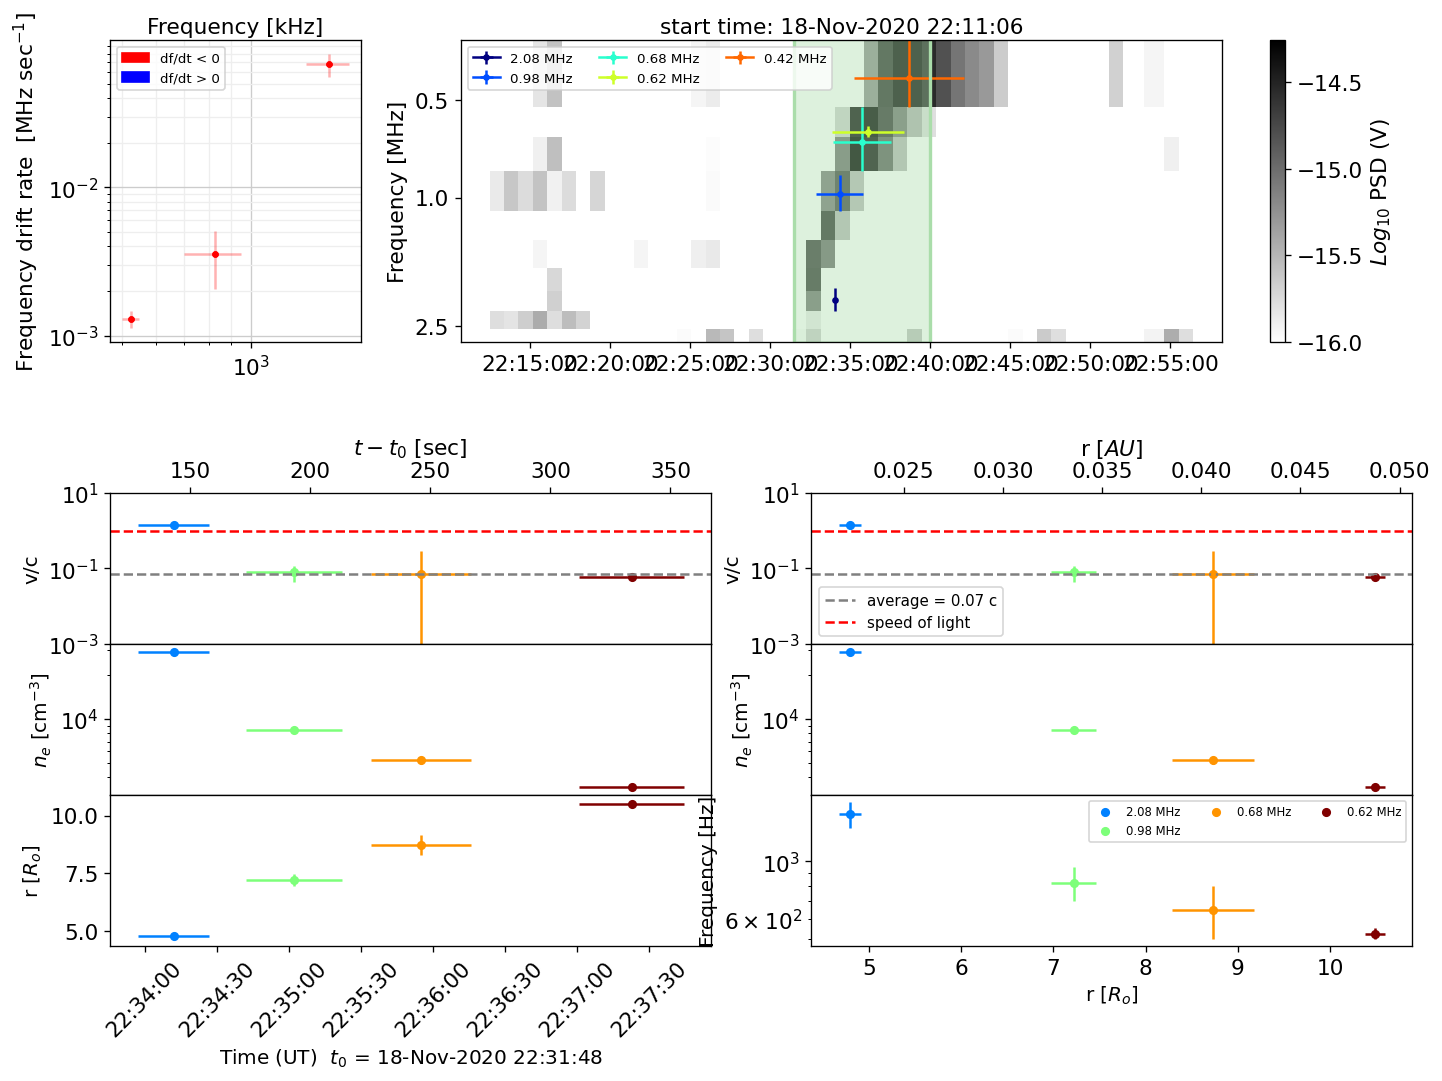

In [5]:
trange_fit = ["18-Nov-2020 22:31:30","18-Nov-2020 22:40:00"]
fp = sololab.rpw_fit_freq_peaks(rpw_psd,sololab.fit_func_gaussian,trange_fit,frequency_range=[0,2500])
fdr = sololab.rpw_freq_drifts(fp)
v = sololab.rpw_estimate_beam_velocity(fdr,sololab.ne_from_r_leblanc)
plt.close()
sololab.rpw_plot_typeIII_diagnostics(rpw_psd,fp,fdr,v)

# EVENT 19 Nov 2020 06:10


Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268344848_20201119T054055-20201119T063555_030127_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf
  Type: RPW L2
  sensors:  (0,) (342080,)
  data cropped from  2020-11-19 05:44:00  to  2020-11-19 06:30:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675 3225 3525 4125 4525
  Creating mean bkg from  19-Nov-2020 05:44:00  to  19-Nov-2020 05:50:00 ...
  bkg done.
Time axis constrained to common time interval...
Time interval from 19-Nov-2020 05:44:21  to  19-Nov-2020 06:29:20


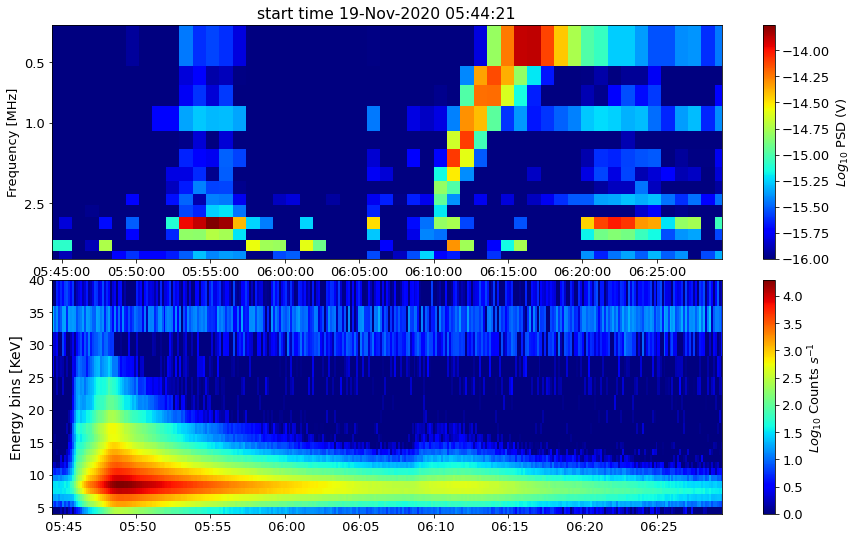

In [6]:
# 19NOV2020 0600
# STIX files
stx_L1file = "../STIX/stx_files/20201119/solo_L1A_stix-sci-xray-l1-1268344848_20201119T054055-20201119T063555_030127_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "19-Nov-2020 05:44:00"
end_time = "19-Nov-2020 06:30:00"

start_bkg = "19-Nov-2020 05:44:00"
end_bkg = "19-Nov-2020 05:50:00"


# select time range datetime
date_range=[start_time,end_time]
date_bkg=[start_bkg,end_bkg]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,rpw_bkg_interval=date_bkg,
                         freq_range=[0,5000])
# markers of interest
markerlines = {#"19-Nov-2020 05:46:00":"limegreen",
               "19-Nov-2020 05:48:30":"white",
               
               #"19-Nov-2020 06:09:00":"limegreen",
               "19-Nov-2020 06:10:00":"white",
              "19-Nov-2020 06:10:30":"orange",}
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,40],#markers=markerlines,
                               markerwidth=2)


Estimated uncertainty:
  Time: 26.5 s
  Freq: between 25.0-300.0 kHz
Defining time reference...
 t0 =  19-Nov-2020 06:10:27
Fitting peaks for 10 frequencies between 425.0 kHz and 2675.0 kHz
[9] 2675 kHz   : Not found
Starting point ---------- frequency: 2425+-125 kHz   time: 19-Nov-2020 06:10:49
[8] 2425 kHz: Fit found!   t-t0: 22.16 s   Dif.: 22.16 s  Log10(RMSE): -16.11  Log10(S/N): 1.42
[7] 2075 kHz   : Not found
[6] 1825 kHz: Fit found!   t-t0: 49.14 s   Dif.: 26.98 s  Log10(RMSE): -16.46  Log10(S/N): 1.44
[5] 1475 kHz: Fit found!   t-t0: 70.27 s   Dif.: 21.13 s  Log10(RMSE): -15.74  Log10(S/N): 1.90
[4] 1225 kHz: Fit found!   t-t0: 100.66 s   Dif.: 30.39 s  Log10(RMSE): -16.81  Log10(S/N): 1.92
[3] 975 kHz: Fit found!   t-t0: 130.60 s   Dif.: 29.93 s  Log10(RMSE): -15.16  Log10(S/N): 1.28
[2] 675 kHz: Fit found!   t-t0: 194.41 s   Dif.: 63.81 s  Log10(RMSE): -15.10  Log10(S/N): 1.63
[1] 625 kHz: Fit found!   t-t0: 217.25 s   Dif.: 22.84 s  Log10(RMSE): -15.03  Log10(S/N): 1.55
[0]

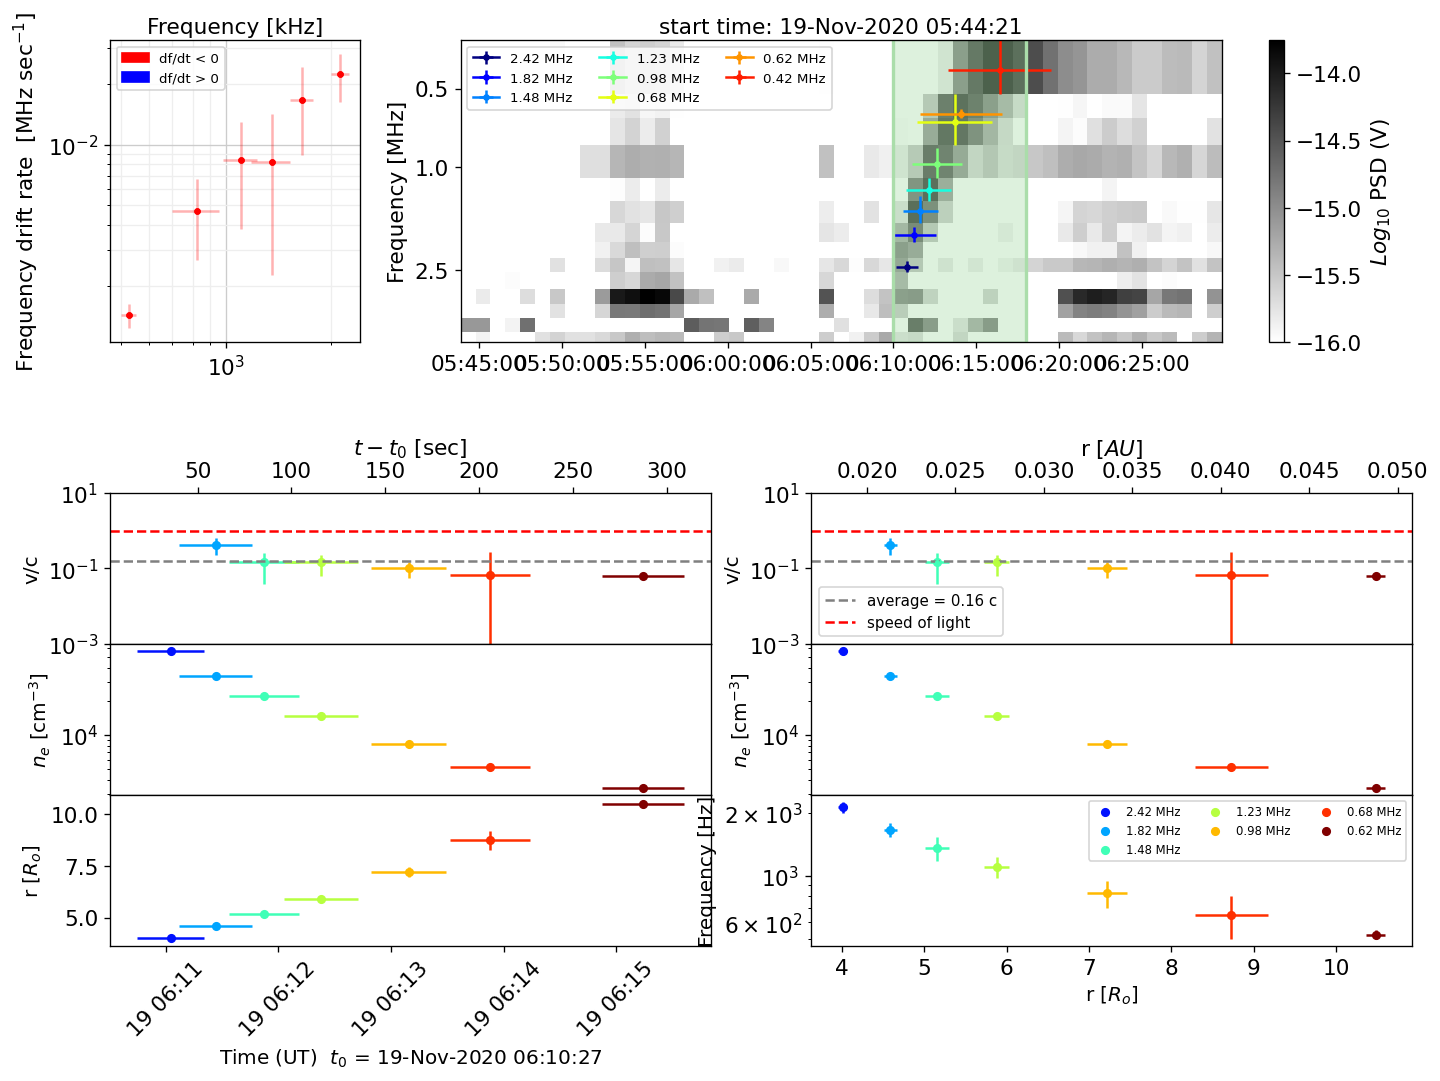

In [7]:
trange_fit = ["19-Nov-2020 06:10:00","19-Nov-2020 06:18:00"]
fp = sololab.rpw_fit_freq_peaks(rpw_psd,sololab.fit_func_gaussian,trange_fit,frequency_range=[0,3200])
fdr = sololab.rpw_freq_drifts(fp)
v = sololab.rpw_estimate_beam_velocity(fdr,sololab.ne_from_r_leblanc)
plt.close()
sololab.rpw_plot_typeIII_diagnostics(rpw_psd,fp,fdr,v)

# EVENT 19 Nov 2020 15:56

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268508944_20201119T154059-20201119T163239_030144_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf
  Type: RPW L2
  sensors:  (0,) (342080,)
  data cropped from  2020-11-19 15:40:00  to  2020-11-19 16:38:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675
  Creating mean bkg from  19-Nov-2020 16:20:00  to  19-Nov-2020 16:30:00 ...
  bkg done.
Time axis constrained to common time interval...
Time interval from 19-Nov-2020 15:41:14  to  19-Nov-2020 16:32:34


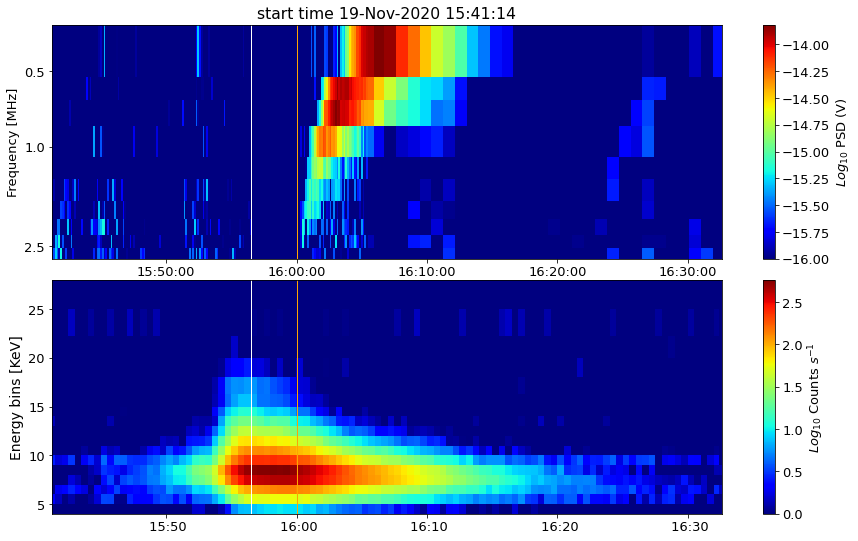

In [8]:
# 19NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201119/solo_L1A_stix-sci-xray-l1-1268508944_20201119T154059-20201119T163239_030144_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "19-Nov-2020 15:40:00"
end_time = "19-Nov-2020 16:38:00"


start_bkg = "19-Nov-2020 16:20:00"
end_bkg = "19-Nov-2020 16:30:00"
# select time range datetime
date_range=[start_time,end_time]
bkg_range=[start_bkg,end_bkg]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,rpw_bkg_interval=bkg_range,
                         freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "19-Nov-2020 16:00:00":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "19-Nov-2020 15:56:30":"white",

            }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,28],
                               markers=markerlines,markerwidth=1)

Estimated uncertainty:
  Time: 7.5 s
  Freq: between 25.0-175.0 kHz
Defining time reference...
 t0 =  19-Nov-2020 16:00:04
Fitting peaks for 10 frequencies between 425.0 kHz and 2675.0 kHz
[9] 2675 kHz   : Not found
[8] 2425 kHz: Fit found!   t-t0: 23.94 s   Dif.: 23.94 s  Log10(RMSE): -15.12  Log10(S/N): 0.44
[7] 2075 kHz: Fit found!   t-t0: 44.07 s   Dif.: 20.13 s  Log10(RMSE): -15.05  Log10(S/N): 0.17
[6] 1825 kHz: Fit found!   t-t0: 66.26 s   Dif.: 22.20 s  Log10(RMSE): -15.16  Log10(S/N): 0.70
[5] 1475 kHz: Fit found!   t-t0: 82.81 s   Dif.: 16.55 s  Log10(RMSE): -14.98  Log10(S/N): 0.54
[4] 1225 kHz: Fit found!   t-t0: 107.16 s   Dif.: 24.35 s  Log10(RMSE): -14.84  Log10(S/N): 0.83
[3] 975 kHz: Fit found!   t-t0: 137.20 s   Dif.: 30.04 s  Log10(RMSE): -14.43  Log10(S/N): 1.16
[2] 675 kHz: Fit found!   t-t0: 204.70 s   Dif.: 67.50 s  Log10(RMSE): -14.00  Log10(S/N): 1.82
[1] 625 kHz: Fit found!   t-t0: 226.55 s   Dif.: 21.84 s  Log10(RMSE): -14.03  Log10(S/N): 2.00
[0] 425 kHz: Fi

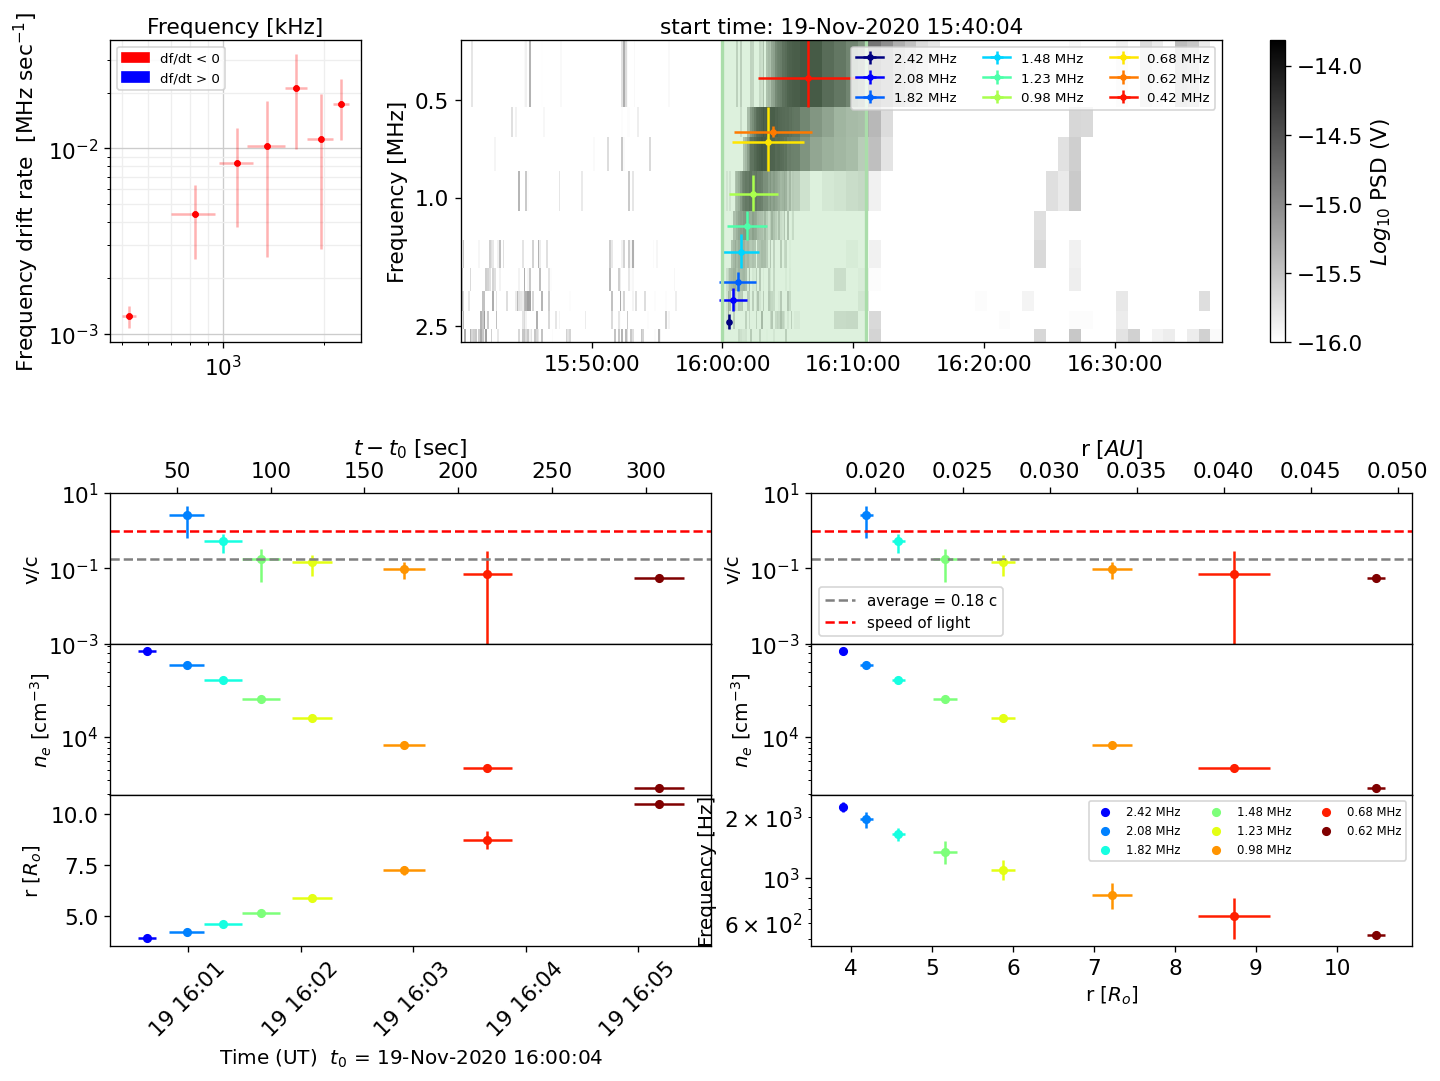

In [9]:
trange_fit = ["19-Nov-2020 16:00:00","19-Nov-2020 16:11:00"]
fp = sololab.rpw_fit_freq_peaks(rpw_psd,sololab.fit_func_gaussian,trange_fit,frequency_range=[0,3200])
fdr = sololab.rpw_freq_drifts(fp)
v = sololab.rpw_estimate_beam_velocity(fdr,sololab.ne_from_r_leblanc)
plt.close()
sololab.rpw_plot_typeIII_diagnostics(rpw_psd,fp,fdr,v)

# EVENT 2020 Nov 21 09:41

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1269458192_20201121T093700-20201121T094810_030161_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201121_V09.cdf
  Type: RPW L2
  sensors:  (0,) (340888,)
  data cropped from  2020-11-21 09:20:00  to  2020-11-21 09:50:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675 3225 3525 4125 4525 5225 5825 6525
  Creating mean bkg from  21-Nov-2020 09:37:00  to  21-Nov-2020 09:40:00 ...
  bkg done.
Time axis constrained to common time interval...
Time interval from 21-Nov-2020 09:37:09  to  21-Nov-2020 09:48:05


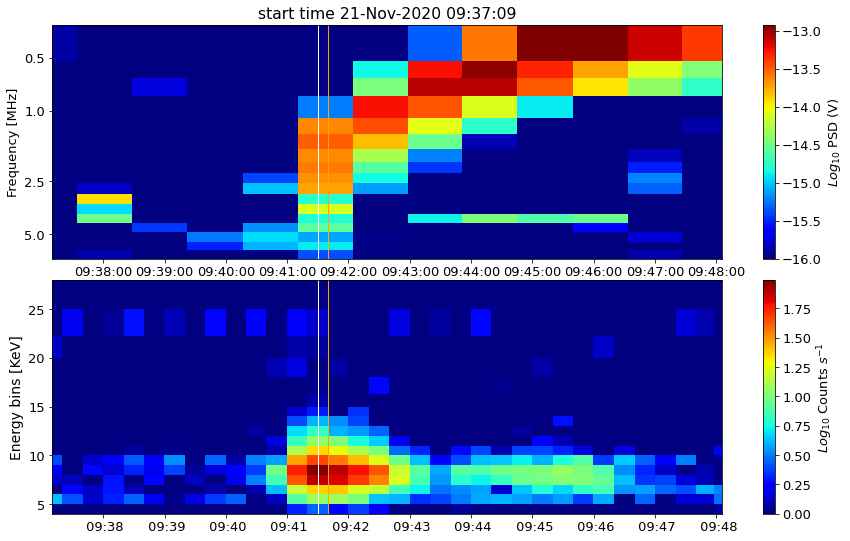

In [10]:
# 20NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20201121/solo_L1A_stix-sci-xray-l1-1269458192_20201121T093700-20201121T094810_030161_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202011_BKG/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202011/solo_L2_rpw-hfr-surv-cdag_20201121_V09.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "21-Nov-2020 09:20:00"
end_time = "21-Nov-2020 09:50:00"

start_bkg = "21-Nov-2020 09:37:00"
end_bkg = "21-Nov-2020 09:40:00"

bkg_range = [start_bkg,end_bkg]

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         rpw_bkg_interval=bkg_range,freq_range=[0,10000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "21-Nov-2020 09:41:40":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "21-Nov-2020 09:41:30":"white",

            }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,28],
                               markers=markerlines,markerwidth=1)

Estimated uncertainty:
  Time: 26.5 s
  Freq: between 25.0-350.0 kHz
Defining time reference...
 t0 =  21-Nov-2020 09:40:43
Fitting peaks for 14 frequencies between 425.0 kHz and 4525.0 kHz
Starting point ---------- frequency: 4525+-350 kHz   time: 21-Nov-2020 09:41:14
[13] 4525 kHz: Fit found!   t-t0: 31.44 s   Dif.: 0.00 s  Log10(RMSE): -15.99  Log10(S/N): 2.04
[12] 4125 kHz: Fit found!   t-t0: 38.54 s   Dif.: 7.10 s  Log10(RMSE): -14.48  Log10(S/N): 0.13
[11] 3525 kHz   : Not found
[10] 3225 kHz   : Not found
[9] 2675 kHz: Fit found!   t-t0: 52.75 s   Dif.: 14.22 s  Log10(RMSE): -19.45  Log10(S/N): 2.26
[8] 2425 kHz: Fit found!   t-t0: 59.61 s   Dif.: 6.86 s  Log10(RMSE): -19.13  Log10(S/N): 2.34
[7] 2075 kHz   : Not found
[6] 1825 kHz: Fit found!   t-t0: 76.62 s   Dif.: 17.01 s  Log10(RMSE): -15.36  Log10(S/N): 2.76
[5] 1475 kHz: Fit found!   t-t0: 78.61 s   Dif.: 2.00 s  Log10(RMSE): -14.60  Log10(S/N): 2.42
[4] 1225 kHz: Fit found!   t-t0: 93.26 s   Dif.: 14.65 s  Log10(RMSE): -1

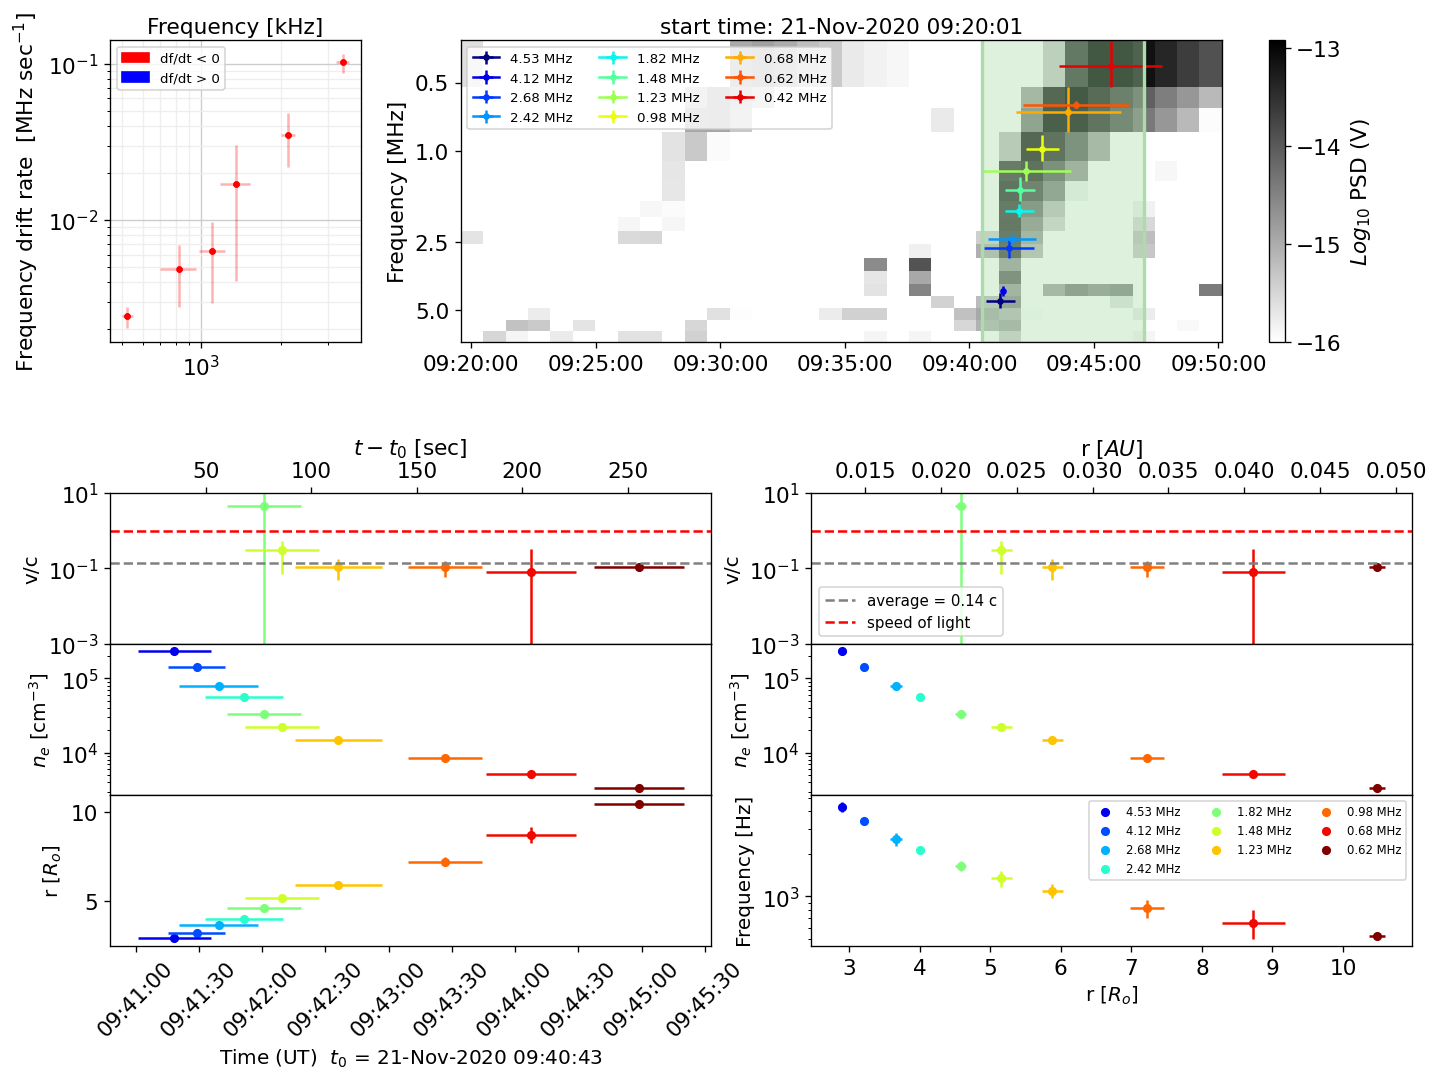

In [11]:
trange_fit = ["21-Nov-2020 09:40:30","21-Nov-2020 09:47:00"]
fp = sololab.rpw_fit_freq_peaks(rpw_psd,sololab.fit_func_gaussian,trange_fit,frequency_range=[0,5000])
fdr = sololab.rpw_freq_drifts(fp)
v = sololab.rpw_estimate_beam_velocity(fdr,sololab.ne_from_r_leblanc)
plt.close()
sololab.rpw_plot_typeIII_diagnostics(rpw_psd,fp,fdr,v)

# EVENT 2021 Jul 17 

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2107170037_20210717T043515-20210717T053459_031085_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2107100004_20210710T230008-20210711T003708_031071_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv_20210717_V01.cdf
  Type: RPW L2
  sensors:  (847761,) (0,)
  data cropped from  2021-07-17 04:34:00  to  2021-07-17 05:34:00
  Selected frequencies [kHz]:  425 625 675 975 1225 1475 1825 2075 2425 2675 3225 3525 4125 4525 4875 5225 5475 5825 6175 6525 6875 8575 9175 12475 13375 13725 14375 14925 15275 15625
  Creating mean bkg from  17-Jul-2021 04:34:00  to  17-Jul-2021 04:48:00 ...
  bkg done.
Time axis constrained to common time interval...
Time interval from 17-Jul-2021 04:35:25  to  17-Jul-2021 05:33:57


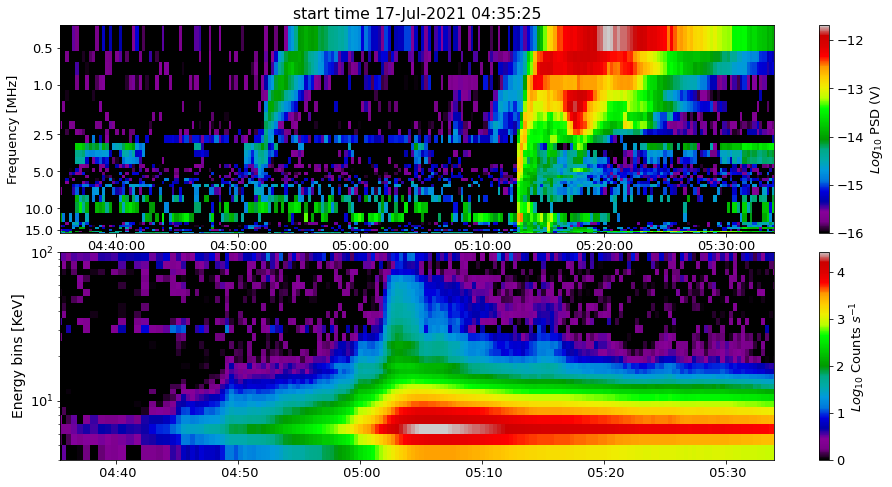

In [15]:
# 20NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/20210717/solo_L1A_stix-sci-xray-l1-2107170037_20210717T043515-20210717T053459_031085_V01.fits"
stx_BKGfile =  "../STIX/stx_files/202107_BKG/solo_L1A_stix-sci-xray-l1-2107100004_20210710T230008-20210711T003708_031071_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/202107/solo_L2_rpw-hfr-surv_20210717_V01.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "17-Jul-2021 04:34:00"
end_time = "17-Jul-2021 05:34:00"

##
start_bkg = "17-Jul-2021 04:34:00"
end_bkg = "17-Jul-2021 04:48:00"


# select time range datetime
date_range=[start_time,end_time]
bkg_range=[start_bkg,end_bkg]

time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         freq_range=[0,16000],rpw_bkg_interval=bkg_range)
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,100],figsize=[16,8],
                              rpw_cmap="nipy_spectral",stix_cmap="nipy_spectral")
plt.yscale('log')

Estimated uncertainty:
  Time: 8.0 s
  Freq: between 25.0-1650.0 kHz
Defining time reference...
 t0 =  17-Jul-2021 04:51:01
Fitting peaks for 18 frequencies between 425.0 kHz and 5825.0 kHz
[17] 5825 kHz   : Not in bounds! omitted.
Starting point ---------- frequency: 5475+-175 kHz   time: 17-Jul-2021 04:51:52
[16] 5475 kHz: Fit found!   t-t0: 50.49 s   Dif.: 50.49 s  Log10(RMSE): -15.17  Log10(S/N): 0.84
[15] 5225 kHz: Fit found!   t-t0: 57.00 s   Dif.: 6.51 s  Log10(RMSE): -14.85  Log10(S/N): 0.87
[14] 4875 kHz: Fit found!   t-t0: 47.53 s   Dif.: -9.47 s  Log10(RMSE): -15.49  Log10(S/N): 1.09
[13] 4525 kHz: Fit found!   t-t0: 42.52 s   Dif.: -5.01 s  Log10(RMSE): -14.93  Log10(S/N): 1.25
[12] 4125 kHz: Fit found!   t-t0: 54.81 s   Dif.: 12.30 s  Log10(RMSE): -14.82  Log10(S/N): 1.41
[11] 3525 kHz: Fit found!   t-t0: 54.51 s   Dif.: -0.30 s  Log10(RMSE): -14.72  Log10(S/N): 1.25
[10] 3225 kHz: Fit found!   t-t0: 50.33 s   Dif.: -4.18 s  Log10(RMSE): -14.16  Log10(S/N): 1.19
[9] 2675 k

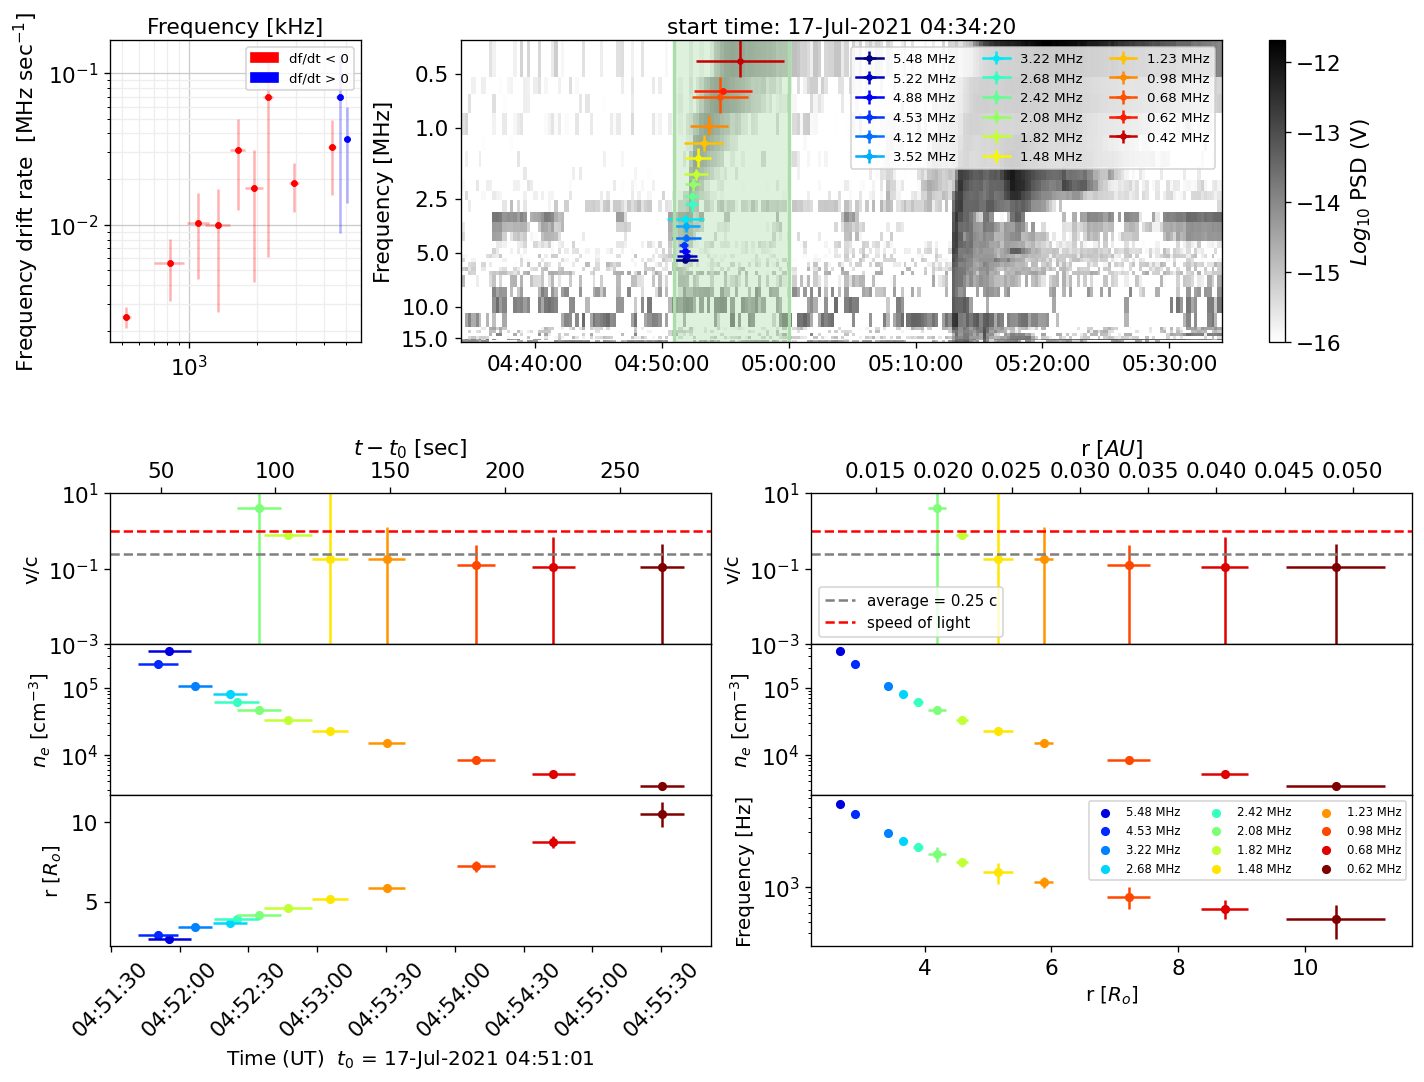

In [16]:
trange_fit = ["17-Jul-2021 04:51:00","17-Jul-2021 05:00:00"]
fp = sololab.rpw_fit_freq_peaks(rpw_psd,sololab.fit_func_gaussian,trange_fit,frequency_range=[0,6000])
fdr = sololab.rpw_freq_drifts(fp)
v = sololab.rpw_estimate_beam_velocity(fdr,sololab.ne_from_r_leblanc)
plt.close()
sololab.rpw_plot_typeIII_diagnostics(rpw_psd,fp,fdr,v)